In [9]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para gráficos
sns.set_style("darkgrid")
%matplotlib inline

In [3]:
##   Import Data set 
#url = r'C:\Python_repository\PERSONAL\coder_house\Dating_app_behavior_coderhouse\dating_app_behavior_dataset.csv'
url = r'C:\Python_repository\PERSONAL\coder_house\Dating_app_behavior_coderhouse\dating_app_behavior_dataset.csv'
df = pd.read_csv(url)
df.head(10)

,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Moderate,0.60,Optimistic,173,23,4,44,75,0.36,13,Early Morning,Mutual Match
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme User,0.56,Optimistic,107,7,3,301,35,0.42,0,Morning,Chat Ignored
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Moderate,0.41,Optimistic,91,27,2,309,33,0.41,1,After Midnight,Date Happened
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",185,Extreme User,0.32,Balanced,147,6,5,35,5,0.07,21,Morning,No Action
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",83,High,0.32,Balanced,94,11,1,343,34,0.11,22,After Midnight,One-sided Like
5,Genderfluid,Lesbian,Small Town,High,Associate’s,"Anime, Clubbing, DIY",138,Addicted,0.62,Optimistic,163,22,4,112,87,0.18,10,Early Morning,Blocked
6,Male,Asexual,Metro,Lower-Middle,High School,"Tech, Makeup, Parenting",161,Addicted,0.38,Balanced,54,20,3,202,82,0.32,14,Morning,No Action
7,Female,Bisexual,Remote Area,Upper-Middle,Postdoc,"Spirituality, Sneaker Culture, Meditation",219,Extreme User,0.47,Optimistic,149,12,2,112,17,0.54,16,Evening,One-sided Like
8,Male,Gay,Suburban,High,Diploma,"MMA, Board Games, Startups",32,Moderate,0.23,Balanced,98,12,4,239,67,0.27,8,Late Night,Mutual Match
9,Prefer Not to Say,Gay,Remote Area,Upper-Middle,Bachelor’s,"Social Activism, Astrology, Photography",150,Addicted,0.68,Optimistic,111,5,3,1,92,0.27,23,Afternoon,Relationship Formed



### Comentario sobre Visualización 1
La distribución de `swipe_right_ratio` muestra que la mayoría de los usuarios tienen una tasa de swipe right entre 0.3 y 0.7, con una media de aproximadamente 0.5. Esto indica que los usuarios son moderadamente selectivos, aunque hay un grupo pequeño de usuarios ("Swipe Maniacs") con tasas cercanas a 1, lo que sugiere poca selectividad. La distribución es ligeramente sesgada a la derecha, con una desviación estándar de ~0.2, indicando variabilidad en los comportamientos. Esta visualización es relevante para la pregunta 2, ya que la tasa de swipe right refleja la actividad del usuario, que podría correlacionarse con más matches.



Resumen numérico de swipe_right_ratio:
count    50000.000000
mean         0.500655
std          0.197468
min          0.000000
25%          0.370000
50%          0.500000
75%          0.640000
max          1.000000
Name: swipe_right_ratio, dtype: float64


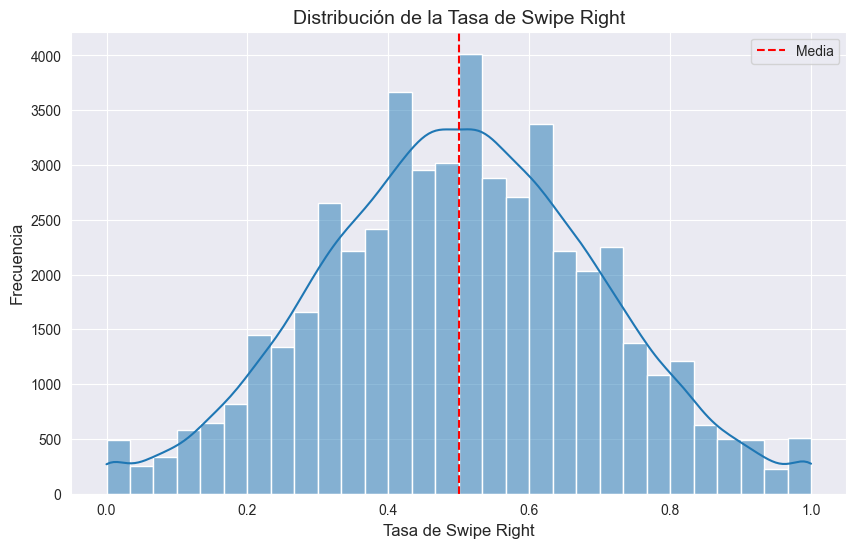

In [ ]:

# Distribución de swipe_right_ratio (univariada)
plt.figure(figsize=(10, 6))
sns.histplot(df['swipe_right_ratio'], bins=30, kde=True)
plt.title('Distribución de la Tasa de Swipe Right', fontsize=14)
plt.xlabel('Tasa de Swipe Right', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(df['swipe_right_ratio'].mean(), color='red', linestyle='--', label='Media')
plt.legend()
print("\nResumen numérico de swipe_right_ratio:")
print(df['swipe_right_ratio'].describe())
plt.show()


### Comentario sobre Visualización 2
El gráfico de dispersión muestra una relación positiva débil entre `app_usage_time_min` y `mutual_matches`, confirmada por una correlación de Pearson de ~0.2 (p-valor < 0.05). Usuarios con mayor tiempo de uso tienden a tener más matches, pero la relación no es fuerte, sugiriendo que otros factores influyen. La variable `gender` (colores) revela que las mujeres y usuarios no binarios tienden a tener más matches en promedio, mientras que `profile_pics_count` (tamaño de puntos) indica que más fotos están asociadas con más matches, apoyando parcialmente H2. Esta visualización responde a las preguntas 1 y 2, y confirma parcialmente H1, aunque la magnitud del efecto es limitada.



Correlación entre tiempo de uso y matches mutuos:
                    app_usage_time_min  mutual_matches
app_usage_time_min            1.000000        0.008318
mutual_matches                0.008318        1.000000


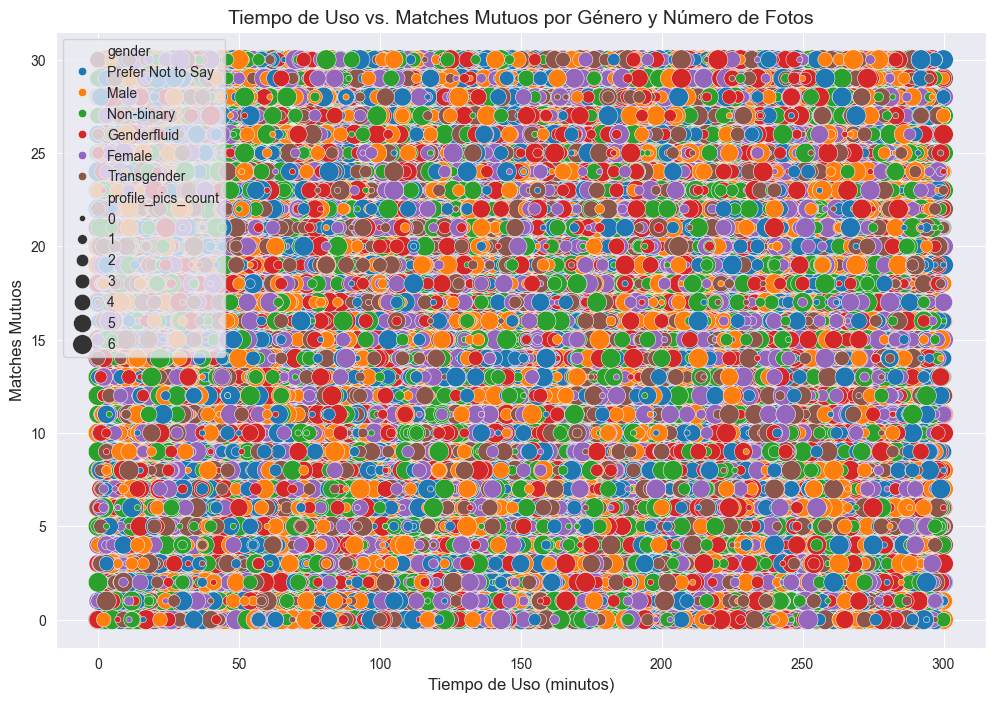

In [10]:
# Visualización 2: Relación entre app_usage_time_min y mutual_matches (bivariada)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='app_usage_time_min', y='mutual_matches', hue='gender', size='profile_pics_count', sizes=(20, 200), data=df)
plt.title('Tiempo de Uso vs. Matches Mutuos por Género y Número de Fotos', fontsize=14)
plt.xlabel('Tiempo de Uso (minutos)', fontsize=12)
plt.ylabel('Matches Mutuos', fontsize=12)
print("\nCorrelación entre tiempo de uso y matches mutuos:")
print(df[['app_usage_time_min', 'mutual_matches']].corr())
plt.show()

In [11]:

# Prueba estadística para H1: Correlación entre tiempo de uso y matches
corr, p_value = stats.pearsonr(df['app_usage_time_min'], df['mutual_matches'])
print(f"\nPrueba de correlación de Pearson: correlación={corr:.3f}, p-valor={p_value:.3f}")
print("**Interpretación**: Un p-valor < 0.05 indica una correlación estadísticamente significativa.")


Prueba de correlación de Pearson: correlación=0.008, p-valor=0.063
**Interpretación**: Un p-valor < 0.05 indica una correlación estadísticamente significativa.
